# NBA 2018/19

In [97]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# naložimo razpredelnico, s katero bomo delali
podatki_surovo = pd.read_csv('urejeni_podatki.csv', index_col='ID')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

In [98]:
del podatki_surovo['geslo']
podatki_surovo.rename(columns={'Tri_FG':'Tri_game'}, inplace=True)
podatki_surovo

,ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,Tri_game,Tri_pct,FT_game,FT_pct,RPG,APG,PPG
ID,,,,,,,,,,,,,,,,
abrinal01,Álex Abrines,198,90,1993,Spain,OKC,SG,31,19.0,1.3,0.323,0.4,0.923,1.5,0.6,5.3
acyqu01,Quincy Acy,201,108,1990,Texas,PHO,PF,10,12.3,0.2,0.133,0.7,0.700,2.5,0.8,1.7
adamsja01,Jaylen Adams,188,86,1996,Maryland,ATL,PG,34,12.6,0.7,0.338,0.2,0.778,1.8,1.9,3.2
adamsst01,Steven Adams,211,120,1993,New Zealand,OKC,C,80,33.4,0.0,0.000,1.8,0.500,9.5,1.6,13.9
adebaba01,Bam Adebayo,206,115,1997,New Jersey,MIA,C,82,23.3,0.0,0.200,2.0,0.735,7.3,2.2,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youngtr01,Trae Young,185,81,1998,Texas,ATL,PG,81,30.9,1.9,0.324,4.2,0.829,3.7,8.1,19.1
zelleco01,Cody Zeller,213,108,1992,Indiana,CHO,C,49,25.4,0.1,0.273,2.3,0.787,6.8,2.1,10.1
zellety01,Tyler Zeller,213,114,1990,California,TOT,C,6,15.5,0.0,0.000,2.3,0.778,4.0,0.7,7.7


### LEGENDA:
GP -- koliko tekem je igralec odigral v sezoni <br>
MP_game -- koliko minut na tekmo igra v povprečju <br>
Tri_game -- koliko trojk na tekmo zadane v povprečju <br>
Tri_pct -- kolikšen ima procent zadetih trojk <br>
FT_game -- koliko prostih metov zadane na tekmo v povprečju <br>
FT_pct -- kolikšen ima procent zadetih prostih metov <br>
RPG -- skoki na tekmo <br>
APG -- asistence na tekmo <br>
PPG -- točke na tekmo 

In [83]:
#podatki_surovo.count()

#### Igralci po državah

poglejmo si koliko igralcev je iz posamezne države. Tu se vsaka zvezna država iz ZDA upošteva posebej. Prikazal sem najpogostejših 20 držav.

In [94]:
podatki_po_drzavah = podatki_surovo.groupby('država').count()
podatki_po_drzavah = podatki_po_drzavah.sort_values('ime_priimek', ascending=False)

<AxesSubplot:title={'center':'Število igralcev iz posamezne države'}, xlabel='država'>

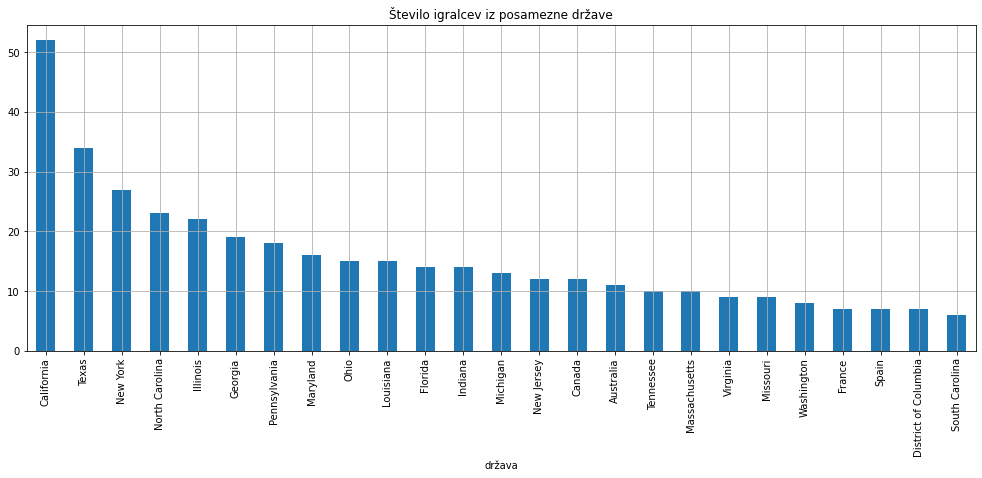

In [139]:
podatki_po_drzavah['ime_priimek'].head(25).plot.bar(title= 'Število igralcev iz posamezne države', figsize=(17,6), grid=True)

#### Višina igralcev glede na pozicijo

C - center (center)  <br>
PF - power forward (krilni center) <br>
SF - small forward (krilo) <br>
SG - shooting guard (branilec) <br>
PG - point guard (organizator igre) <br>

Igralce grupiramo glede na pozicijo na kateri igrajo in predstavimo njihovo višino. V grafu vidimo da imajo najnižjo povprečno višino igralci ki igrajo na pociji organizatorja igre. Višina igralcev na tej poziciji tudi najbolj varira. Po pričakovanju so najvišji igralci na poziciji centra in krilnega centra.

<AxesSubplot:title={'center':'višina'}, xlabel='pozicija'>

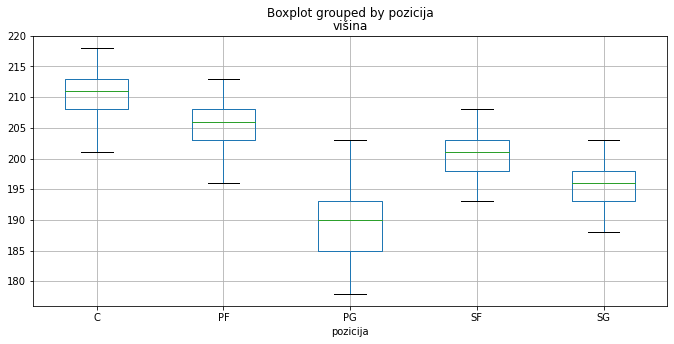

In [165]:
#podatki_po_pozicijah = podatki_surovo.groupby('pozicija', as_index=False)['višina'].mean().sort_values('višina', ascending=False)
#podatki_po_pozicijah = podatki_po_pozicijah.drop([1,3,4,7], axis=0)
podatki_pozicija = podatki_surovo[(podatki_surovo.pozicija !='C,PF')&
                                  (podatki_surovo.pozicija !='PF,SF')&
                                 (podatki_surovo.pozicija !='PF,SG')&
                                 (podatki_surovo.pozicija !='SF,SG')]
podatki_pozicija.boxplot(by='pozicija', column='višina', showfliers=False, figsize=(11,5), grid=True)
#podatki_surovo.groupby('pozicija').count()

#### Prikaz igralcev glede na starost

#### Povezava med procentom meta in višino/težo igralca

S pomočjo razsevnega diagrama si poglejmo kako višina in teža vplivata na procent meta za tri točke in proste mete. vidimo, da pri metu za tri točke povezava ni očitna, medtem ko je pri prostih metih mogoče opaziti negativno povezanost med procentom meta in višino oziroma težo igralca.

<AxesSubplot:title={'center':'Povezava procenta zadetih trojk in višine'}, xlabel='višina', ylabel='Tri_pct'>

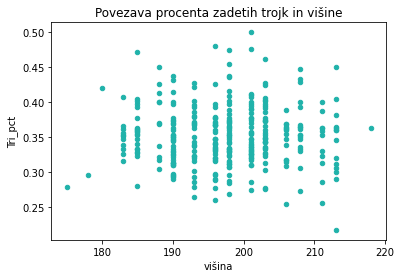

In [132]:
podatki_tri = podatki_surovo[(podatki_surovo.GP>=10) & (podatki_surovo.Tri_game>=0.5) ]
#podatki_tri
podatki_tri.plot.scatter(x='višina',y='Tri_pct', title= 'Povezava procenta zadetih trojk in višine', color = "LightSeaGreen")

<AxesSubplot:title={'center':'Povezava procenta zadetih trojk in teže'}, xlabel='teža', ylabel='Tri_pct'>

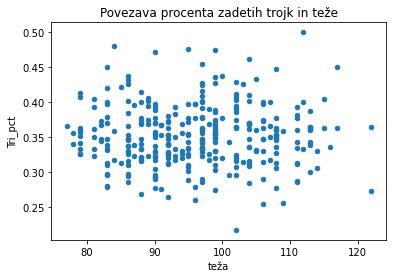

In [109]:
podatki_tri = podatki_surovo[(podatki_surovo.GP>=10) & (podatki_surovo.Tri_game>=0.5) ]
#podatki_tri
podatki_tri.plot.scatter(x='teža',y='Tri_pct', title= 'Povezava procenta zadetih trojk in teže')

<AxesSubplot:title={'center':'Povezava procenta zadetih prostih metov in višine'}, xlabel='višina', ylabel='FT_pct'>

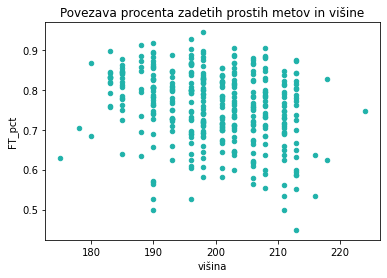

In [133]:
podatki_ft = podatki_surovo[(podatki_surovo.GP>=10) & (podatki_surovo.FT_game>=0.5) ]
podatki_ft
podatki_ft.plot.scatter(x='višina',y='FT_pct', title= 'Povezava procenta zadetih prostih metov in višine', color = "LightSeaGreen")

<AxesSubplot:title={'center':'Povezava procenta zadetih prostih metov in teže'}, xlabel='teža', ylabel='FT_pct'>

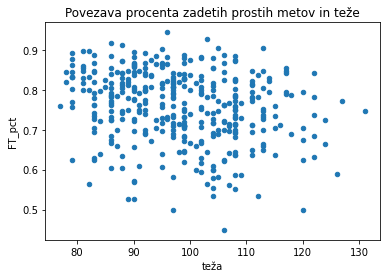

In [111]:
podatki_ft = podatki_surovo[(podatki_surovo.GP>=10) & (podatki_surovo.FT_game>=0.5) ]
podatki_ft
podatki_ft.plot.scatter(x='teža',y='FT_pct', title= 'Povezava procenta zadetih prostih metov in teže')

#### Kdo ima najboljši in najslabši procent zadetih trojk

Poiščimo igralce z najboljšim procentom zadetih trojk, pod pogojem da je igral vsaj 25 tekem in metal vsaj 0.8 trojk na tekmo.

In [103]:
podatki_surovo[(podatki_surovo.GP >= 25) & 
        (podatki_surovo.Tri_game >= 0.8)][['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
                                  'GP', 'MP_game', 'Tri_game', 'Tri_pct', 'PPG']].sort_values('Tri_pct', ascending = False).head(10)

,ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,Tri_game,Tri_pct,PPG
ID,,,,,,,,,,,,
carusal01,Alex Caruso,196,84,1994,Texas,LAL,PG,25,21.2,1.0,0.480,9.2
harrijo01,Joe Harris,198,99,1991,Washington,BRK,SG,76,30.2,2.4,0.474,13.7
greenda02,Danny Green,198,97,1987,New York,TOR,SG,80,27.7,2.5,0.455,10.3
leoname01,Meyers Leonard,213,117,1992,Illinois,POR,C,61,14.4,0.8,0.450,5.9
curryse01,Seth Curry,188,83,1990,North Carolina,POR,SG,74,18.9,1.5,0.450,7.9
bacondw01,Dwayne Bacon,198,100,1995,Florida,CHO,SG,43,17.7,0.9,0.437,7.3
curryst01,Stephen Curry,190,86,1988,Ohio,GSW,PG,69,33.8,5.1,0.437,27.3
gallida01,Danilo Gallinari,208,105,1988,Italy,LAC,SF,68,30.3,2.4,0.433,19.8
mooreet01,E'Twaun Moore,190,86,1989,Indiana,NOP,SG,53,27.6,1.4,0.432,11.9


Kdo so igralci z najslabšim procentom zadetih prostih metov, pod pogojem da je igral vsaj 40 tekem in metal vsaj 1.5 trojk na tekmo.

In [104]:
podatki_surovo[(podatki_surovo.GP >= 40) & 
        (podatki_surovo.Tri_game >= 1.5)][['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
                                  'GP', 'MP_game', 'Tri_game', 'Tri_pct', 'PPG']].sort_values('Tri_pct', ascending = True).head(10)

,ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,Tri_game,Tri_pct,PPG
ID,,,,,,,,,,,,
westbru01,Russell Westbrook,190,90,1988,California,OKC,PG,73,36.0,1.6,0.290,22.9
kuzmaky01,Kyle Kuzma,203,99,1995,Michigan,LAL,PF,70,33.1,1.8,0.303,18.7
oubreke01,Kelly Oubre Jr.,201,92,1995,Louisiana,TOT,SF,69,28.0,1.6,0.320,15.2
youngtr01,Trae Young,185,81,1998,Texas,ATL,PG,81,30.9,1.9,0.324,19.1
clarkjo01,Jordan Clarkson,193,87,1992,Florida,CLE,SG,81,27.3,1.8,0.324,16.8
holidjr01,Jrue Holiday,190,92,1990,California,NOP,SG,67,35.9,1.8,0.325,21.2
bookede01,Devin Booker,196,95,1996,Michigan,PHO,SG,64,35.0,2.1,0.326,26.6
doncilu01,Luka Dončić,201,98,1999,Slovenia,DAL,SG,72,32.2,2.3,0.327,21.2
balllo01,Lonzo Ball,198,86,1997,California,LAL,PG,47,30.3,1.6,0.329,9.9


#### Kdo ima najboljši in najslabši procent zadetih prostih metov

Poiščimo igralce z najboljšim procentom prostih metov, pod pogojem da je igral vsaj 25 tekem in metal vsaj 0.5 prostih metov na tekmo.

In [105]:
podatki_surovo[(podatki_surovo.GP >= 25) & 
        (podatki_surovo.FT_game >= 0.5)][['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
                                  'GP', 'MP_game', 'FT_game', 'FT_pct', 'PPG']].sort_values('FT_pct', ascending = False).head(10)

,ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,FT_game,FT_pct,PPG
ID,,,,,,,,,,,,
brogdma01,Malcolm Brogdon,196,103,1992,Georgia,MIL,SG,64,28.6,2.2,0.928,15.6
curryst01,Stephen Curry,190,86,1988,Ohio,GSW,PG,69,33.8,3.8,0.916,27.3
lillada01,Damian Lillard,188,88,1990,California,POR,PG,80,35.5,5.9,0.912,25.8
gallida01,Danilo Gallinari,208,105,1988,Italy,LAC,SF,68,30.3,5.4,0.904,19.8
belinma01,Marco Belinelli,196,95,1986,Italy,SAS,SG,79,23.0,1.4,0.903,10.5
holidju01,Justin Holiday,198,82,1989,California,TOT,SG,82,31.8,1.2,0.896,10.5
ferreyo01,Yogi Ferrell,183,81,1993,Indiana,SAC,PG,71,15.0,0.8,0.896,5.9
redicjj01,J.J. Redick,190,90,1984,Tennessee,PHI,SG,76,31.3,3.0,0.894,18.1
clarkia01,Ian Clark,190,79,1991,Tennessee,NOP,SG,60,16.2,0.6,0.892,6.7


Kdo so igralci z najslabšim procentom zadetih prostih metov, pod pogojem da je igral vsaj 40 tekem in metal vsaj 1 prosti met na tekmo.

In [106]:
podatki_surovo[(podatki_surovo.GP >= 40) & 
        (podatki_surovo.FT_game >= 1)][['ime_priimek', 'višina', 'teža', 'rojstvo', 'država', 'ekipa', 'pozicija', 
                                  'GP', 'MP_game', 'FT_game', 'FT_pct', 'PPG']].sort_values('FT_pct', ascending = True).head(10)

,ime_priimek,višina,teža,rojstvo,država,ekipa,pozicija,GP,MP_game,FT_game,FT_pct,PPG
ID,,,,,,,,,,,,
whiteha01,Hassan Whiteside,213,106,1989,North Carolina,MIA,C,72,23.3,1.5,0.449,12.3
adamsst01,Steven Adams,211,120,1993,New Zealand,OKC,C,80,33.4,1.8,0.500,13.9
caulewi01,Willie Cauley-Stein,213,108,1993,Kansas,SAC,C,81,27.3,1.7,0.551,11.9
plumlma01,Mason Plumlee,211,107,1990,Indiana,DEN,C,82,21.1,1.4,0.561,7.8
drumman01,Andre Drummond,208,126,1993,New York,DET,C,79,33.5,3.1,0.590,17.3
robinmi01,Mitchell Robinson,213,101,1998,Florida,NYK,C,66,20.6,1.2,0.600,7.3
simmobe01,Ben Simmons,208,104,1996,Australia,PHI,PG,79,34.2,3.3,0.600,16.9
jonesde02,Derrick Jones Jr.,198,95,1997,Pennsylvania,MIA,SF,60,19.2,1.2,0.607,7.0
davised01,Ed Davis,206,102,1989,District of Columbia,BRK,C,81,17.9,1.2,0.617,5.8
